In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy

# % tensor(0.79896647, requires_grad=True) Parameter containing: sigma
# % tensor(0.77245069, requires_grad=True) Parameter containing: mu 
# % tensor(0.19748305, requires_grad=True) Parameter containing: lamb
# % tensor(0.26475501, requires_grad=True) Parameter containing: beta
# % tensor(2.09203029, requires_grad=True) Parameter containing: psi
# % tensor(0.45630980, requires_grad=True) Parameter containing:phi
# % tensor(0.31182873, requires_grad=True) chi

# t1, final_y_1 = getEulerBOLD(sigma=0.8, mu=0.77, lamb=0.19, beta=0.26, phi=0.45, psi=2.09, chi=0.31, noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)
# final_y_1 = final_y_1 / torch.std(final_y_1)

# t1, final_y_2 = getEulerBOLD(sigma=0.8, mu=0.77, lamb=0.19, beta=0.1, phi=0.45, psi=2.09, chi=0.31, noise=True, length=1000)
# final_y_2 = torch.stack(final_y_2)
# final_y_2 = final_y_2 / torch.std(final_y_2)

# t1, final_y_3 = getEulerBOLD(sigma=0.8, mu=0.77, lamb=0.19, beta=1.0, phi=0.45, psi=2.09, chi=0.31, noise=True, length=1000)
# final_y_3 = torch.stack(final_y_3)
# final_y_3 = final_y_3 / torch.std(final_y_3)


Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


(0.0, 0.1)

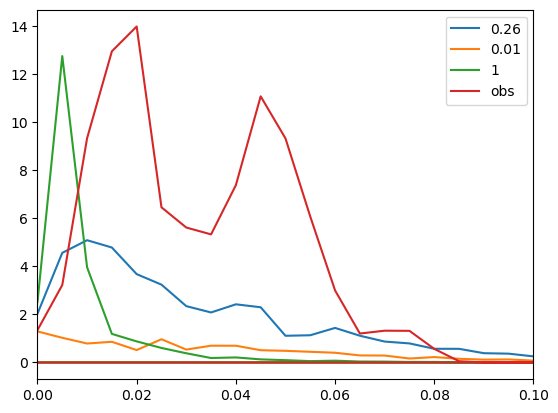

In [10]:
f1,p1 = csd(final_y_1, final_y_1, fs=100, nperseg=20000)
f1,p2 = csd(final_y_2, final_y_2, fs=100, nperseg=20000)
f1,p3 = csd(final_y_3, final_y_3, fs=100, nperseg=20000)

observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI36.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

fo, po = csd(observed_bold, observed_bold, fs=0.5, nperseg = 100)

plt.plot(f1.detach(), p1.detach(), label='0.26')
plt.plot(f1.detach(), p2.detach(), label='0.01')
plt.plot(f1.detach(), p3.detach(), label='1')
plt.plot(fo.detach(), po.detach(), label='obs')
plt.legend()
plt.xlim(0, 0.1)

In [32]:
observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


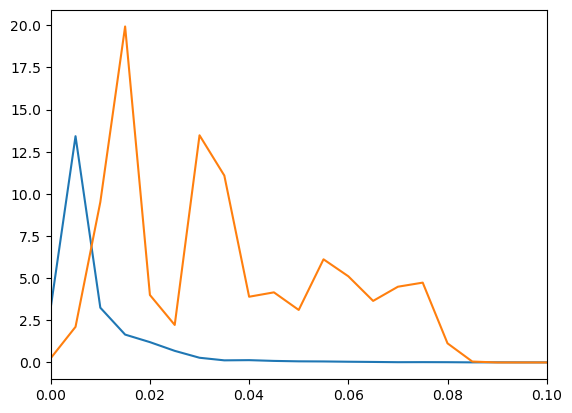

In [38]:
f1,p1 = csd(y1, y1, fs=100, nperseg=20000)
f2,p2 = csd(y2, y2, fs=100, nperseg=20000)
fo, po = csd(observed_bold, observed_bold, fs=0.5, nperseg = 100)
f1 = torch.fft.fftshift(f1)
p1 = torch.fft.fftshift(p1)
fo = torch.fft.fftshift(fo)
po = torch.fft.fftshift(po)
freq_range = 0.1


mask_f1 = torch.isin(f1, fo)
p1_ds = p1[mask_f1]


plt.xlim(0, 0.1)
plt.plot(fo.detach(), p1_ds.detach())
plt.plot(fo.detach(), po.detach())


ValueError: x and y must have same first dimension, but have shapes torch.Size([8]) and torch.Size([21])

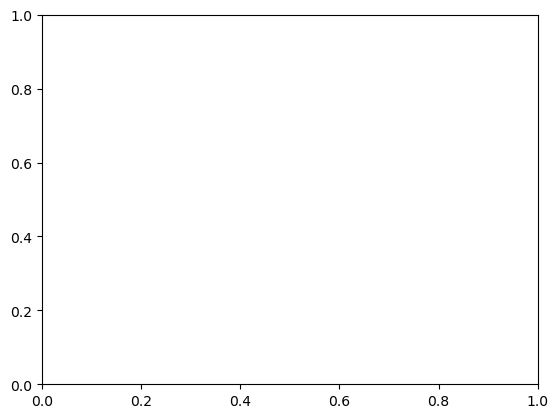

In [64]:
# plt.plot(f1.detach(),p1.detach() * 7, label='simulated')
plt.plot(f1_positive.detach(), p1_downsampled.detach(), label='downsampled after')
# plt.plot(f2.detach(),p2.detach() * 7, label='simulated')
# plt.plot(f.detach(), csd2.detach(), label='downsampled after')
plt.plot(fo_positive.detach(),po_downsampled.detach(), label='observed')
plt.legend()
plt.xlim(0, 0.1)
plt.grid()

(0.0, 0.1)

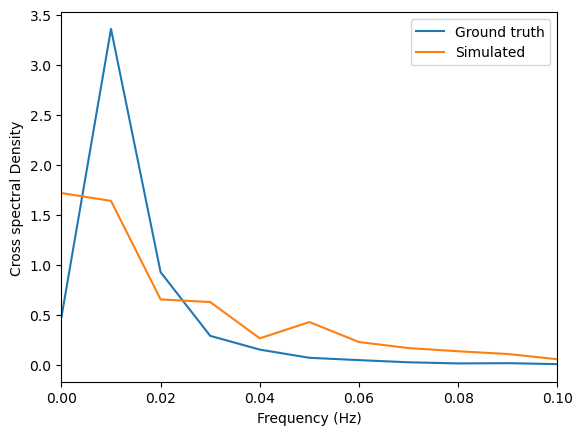

In [47]:
import scipy


# t1, final_y_1 = getEulerBOLD(sigma=0.504, noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)
# y1 = final_y_1/final_y_1.std()
# f1,p1 = csd(y1, y1, fs=100, nperseg=10000)
# f1, p1 = torch.fft.fftshift(f1), torch.fft.fftshift(p1)
# plt.plot(f1.detach(), p1.detach(), label='Simulated')



# t1, final_y_1 = getEulerBOLD(noise=True, length=1000)
# final_y_1 = torch.stack(final_y_1)
# y1 = final_y_1/final_y_1.std()
# f1,p1 = csd(y1, y1, fs=100, nperseg=10000)
# f1, p1 = torch.fft.fftshift(f1), torch.fft.fftshift(p1)
observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series_take_2/sub-001-PLCB-ROI36.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()
plt.plot(f1.(),p1.detach(), label='Ground truth')

sp = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)
plt.plot(f1, scipy.fft.fftshift(sp), label='Simulated')

# plt.plot(f1.detach(),p1.detach() * 7, label='simulated')

# plt.plot(f2.detach(),p2.detach() * 7, label='simulated')
# plt.plot(f.detach(), csd2.detach(), label='downsampled after')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral Density")
plt.legend()
plt.xlim(0, 0.1)

In [56]:
p1.shape

torch.Size([7100])

In [57]:
po.shape

torch.Size([100])

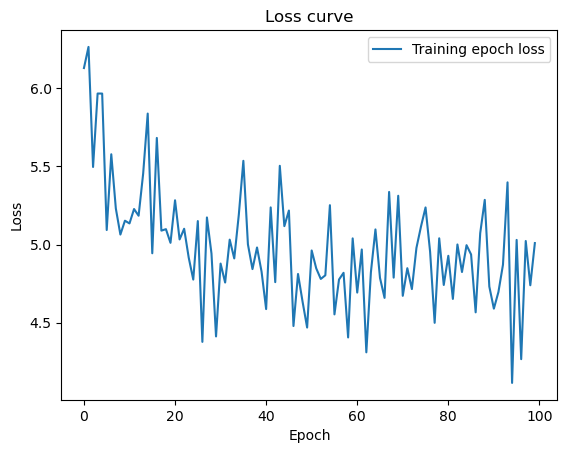

In [5]:
import json

# Read JSON file
with open("losses-sub-001-PLCB-ROI2.json", 'r') as json_file:
    losses = json.load(json_file)


epochs = np.arange(len(losses))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.plot(epochs, losses, label='Training epoch loss')
plt.legend()
plt.show()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


Text(0, 0.5, 'Cross spectral density')

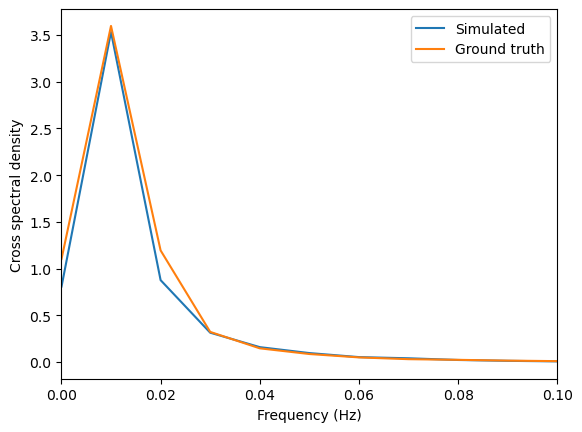

In [15]:
# _, y0 = getEulerBOLD(noise=True, length=1000)
# y0 = torch.stack(y0)
# y0 = y0 / torch.std(y0)
# f2, csdy = csd(y0, y0, fs=100, nperseg = 10000)

# tensor(1.07831717, requires_grad=True) Parameter containing: sigma
# tensor(0.94819546, requires_grad=True) Parameter containing: mu
# tensor(0.48385170, requires_grad=True) Parameter containing: lamb
# tensor(0.03255028, requires_grad=True) Parameter containing: beta
# tensor(1.83636320, requires_grad=True) Parameter containing: psi
# tensor(0.64763081, requires_grad=True) Parameter containing: phi
# tensor(0.44030708, requires_grad=True) chi

observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

# tensor(1.04865110, requires_grad=True) Parameter containing:
# tensor(0.95490003, requires_grad=True) Parameter containing:
# tensor(0.36769497, requires_grad=True) Parameter containing:
# tensor(1.01612020, requires_grad=True) Parameter containing:
# tensor(1.84128356, requires_grad=True) Parameter containing:
# tensor(0.65316117, requires_grad=True) Parameter containing:
# tensor(0.45273337, requires_grad=True)
_, y1 = getEulerBOLD(sigma=torch.tensor(1.04865110), mu=torch.tensor(0.95490003), lamb=torch.tensor(0.36769497), beta=torch.tensor(1.01612020), psi=torch.tensor(1.84128356), phi=torch.tensor(0.65316117), chi=torch.tensor(0.45273337), noise=True, length=1000)
y1 = torch.stack(y1)
y1 = y1 / torch.std(y1)
f2, csdx = csd(y1, y1, fs=100, nperseg = 10000)

# csdx = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)

f2 = torch.fft.fftshift(f2)
csdy = torch.fft.fftshift(csdy)
csdx = torch.fft.fftshift(csdx)

plt.plot(f2.detach(), csdx.detach(), label="Simulated")
plt.plot(f2.detach(), csdy.detach(), label="Ground truth")
# sp = np.loadtxt("final_spectrum_sub-001-LSD-ROI2.txt", delimiter=',', dtype=complex)
# plt.plot(fo, sp)
# plt.plot(fo, po)
plt.xlim(0, 0.1)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral density")


# sigma=0.5, mu=0.4, lamb=0.2, c=0.25,
#                  psi=0.6, phi=1.5, chi=0.6,
    
# y = torch.stack(y)
# y = y / torch.std(y)
# f1, csdx = csd(y, y, fs=100, nperseg = 10000)
# _, y0 = getEulerBOLD(noise=True, length=1000)
# y0 = torch.stack(y0)
# y0 = y0 / torch.std(y0)
# f2, csdy = csd(y0, y0, fs=100, nperseg = 10000)

# # sp = np.loadtxt("final_spectrum_simulated.txt", delimiter=',', dtype=complex)
# plt.plot(f1.detach(), csdx.detach())
# plt.plot(f2.detach(), csdy.detach())
# # sp = np.loadtxt("final_spectrum_sub-001-LSD-ROI2.txt", delimiter=',', dtype=complex)
# # plt.plot(fo, sp)
# # plt.plot(fo, po)
# plt.xlim(0, 0.1)